# ALP Data Mining Elearn (Pak Edwin)-0706022110033-Andrew Lin

In [6]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.naive_bayes import GaussianNB

# Load Dataset

In [10]:
import pandas as pd
df_path = r'C:\Users\Andrew Lin\Downloads\dataset elearn dm alp\Student_Prediction\data.csv'
df = pd.read_csv(df_path, sep=';')
output_df = df.head()
print(output_df)

   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                         

# Data preparation and cleaning

In [63]:
duplicate_rows = df[df.duplicated()]
total_duplicate_rows = df.duplicated().sum()
print(f"Total Duplicate Rows: {total_duplicate_rows}")
print(duplicate_rows)


Total Duplicate Rows: 1
      Marital status  Previous qualification  Nationality  Admission grade  \
2304               1                       1            1             95.0   

      Scholarship holder  Age at enrollment  International  \
2304                   0                 20              0   

      Curricular units 1st sem (credited)  \
2304                                    0   

      Curricular units 1st sem (enrolled)  \
2304                                    5   

      Curricular units 1st sem (evaluations)  ...  \
2304                                      14  ...   

      Curricular units 2nd sem (credited)  \
2304                                    0   

      Curricular units 2nd sem (enrolled)  \
2304                                    5   

      Curricular units 2nd sem (evaluations)  \
2304                                       5   

      Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
2304                                    0      

In [13]:
df_path = r'C:\Users\Andrew Lin\Downloads\dataset elearn dm alp\Student_Prediction\data.csv'
df = pd.read_csv(df_path, sep=';')
df_info = df.info()
print(df_info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [15]:
df_path = r'C:\Users\Andrew Lin\Downloads\dataset elearn dm alp\Student_Prediction\data.csv'
df = pd.read_csv(df_path, sep=';')
missing_values = df.isna().sum()
print(missing_values)


Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [19]:
missing_values = df.isna().sum()
threshold = 1000
columns_to_drop = missing_values[missing_values > threshold].index
df = df.drop(columns=columns_to_drop)
df = df.rename(columns={"Nacionality": "Nationality"})
df['Target'] = LabelEncoder().fit_transform(df['Target'])
df_head = df.head()
print(df_head)


   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nationality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                         

# EDA

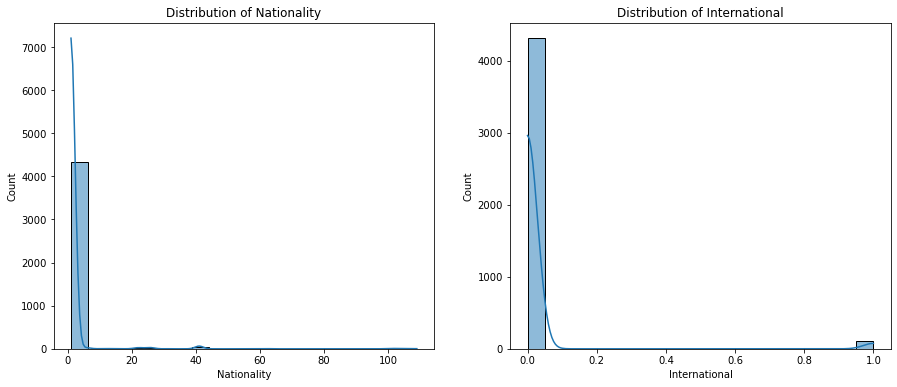

In [64]:
df_path = r'C:\Users\Andrew Lin\Downloads\dataset elearn dm alp\Student_Prediction\data.csv'
df = pd.read_csv(df_path, sep=';')
columns_to_drop = ['Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t',
                   'Previous qualification (grade)', "Mother's qualification", "Father's qualification",
                   "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs',
                   'Debtor', 'Tuition fees up to date', 'Unemployment rate', 'Gender']
df = df.drop(columns=columns_to_drop)
df = df.rename(columns={"Nacionality": "Nationality"})
df['Target'] = LabelEncoder().fit_transform(df['Target'])
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Nationality'], bins=20, kde=True)
plt.title('Distribution of Nationality')
plt.subplot(1, 2, 2)
sns.histplot(df['International'], bins=20, kde=True)
plt.title('Distribution of International')

plt.show()


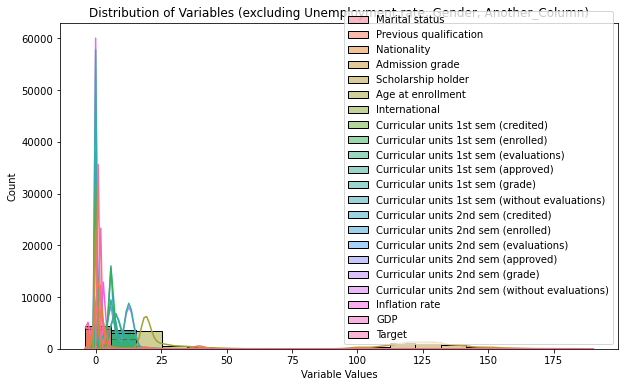

In [30]:
variable_to_exclude = 'Another_Column'
excluded_variables = ['Unemployment rate', 'Gender', variable_to_exclude]
variables_to_plot = [col for col in df.columns if col not in excluded_variables]
plt.figure(figsize=(10, 6))
sns.histplot(data=df[variables_to_plot], bins=20, kde=True)
plt.title(f'Distribution of Variables (excluding {", ".join(excluded_variables)})')
plt.xlabel('Variable Values')
plt.ylabel('Count')
plt.show()


In [32]:
dfscaled = StandardScaler().fit_transform(df)

# K-Means Clustering

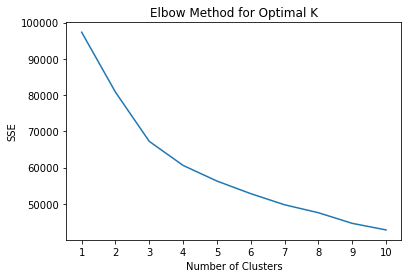

In [34]:
kmeans_params = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
SSE = [KMeans(n_clusters=k, **kmeans_params).fit(dfscaled).inertia_ for k in range(1, 11)]
plt.plot(range(1, 11), SSE)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal K")
plt.show()


In [39]:
from kneed import KneeLocator
findknee = KneeLocator(range(1, 11), SSE, curve="convex", direction="decreasing")
best_k = findknee.elbow

print(f'Optimal k value: {best_k}')

Optimal k value: 4


In [40]:
kmeans_params = {
    "n_init": 3,
    "n_clusters": 4,
    "max_iter": 300,
    "random_state": 42
}
kmeans = KMeans(**kmeans_params)
df['K-Means'] = kmeans.fit_predict(dfscaled)

# Hierarchical Clustering

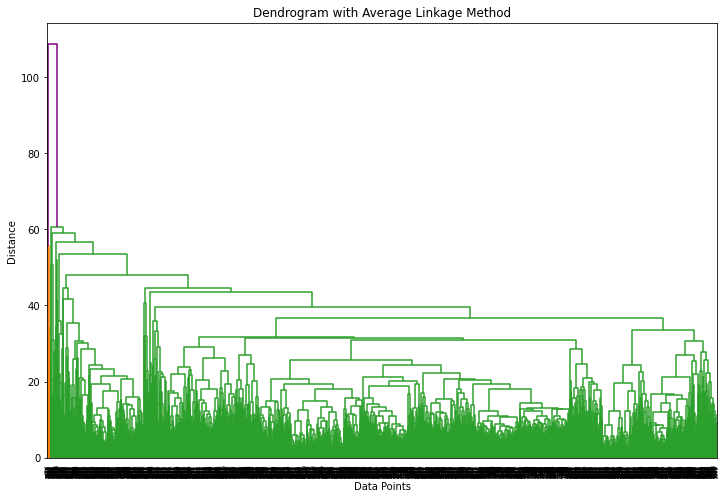

In [70]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
column_to_drop = 'K-Means'
# Check if the column exists before dropping
if column_to_drop in df.columns:
    data_for_dendrogram = df.drop(column_to_drop, axis=1)
else:
    data_for_dendrogram = df.copy()

linkage_matrix = linkage(data_for_dendrogram, method='average', metric='euclidean')

plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, orientation='top', p=30, truncate_mode='level', show_leaf_counts=True, above_threshold_color='purple')
plt.title('Dendrogram with Average Linkage Method')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


# Prediction Model: Logistic Regression

In [73]:
X = df.drop("Target", axis=1)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(random_state=0)
logreg.fit(X_train_scaled, y_train)

ypred = logreg.predict(X_test_scaled)
print(ypred)


[2 0 2 2 1 0 2 2 0 2 0 0 1 2 0 2 1 0 2 1 0 2 2 2 2 0 0 0 2 2 0 0 2 2 2 2 2
 2 0 0 2 0 2 2 2 1 0 2 2 2 0 0 1 0 2 0 2 2 0 2 1 1 2 1 0 2 0 2 2 0 0 2 1 0
 0 2 1 0 2 2 2 1 2 2 0 2 0 0 0 2 0 2 0 1 0 0 2 2 2 0 2 2 2 2 2 0 1 0 2 0 2
 1 0 2 0 0 2 2 0 2 0 2 0 0 2 0 2 0 0 2 2 2 0 2 2 2 0 2 0 0 2 1 0 1 2 2 2 0
 0 2 0 0 0 0 2 0 0 0 2 1 2 0 0 0 0 2 2 0 1 0 1 0 2 2 0 2 0 1 1 2 1 0 0 2 2
 2 1 0 2 2 1 1 2 2 1 2 1 2 0 2 1 0 2 2 0 2 2 2 0 0 2 2 0 2 1 1 2 2 1 2 2 2
 2 2 0 2 1 2 2 1 2 2 0 0 2 2 2 1 2 2 0 2 1 1 2 2 2 2 0 2 2 0 2 2 2 0 2 2 2
 2 2 2 0 2 0 2 2 2 0 1 2 2 2 2 0 2 2 1 0 2 0 2 2 2 2 0 2 2 2 1 1 0 0 2 0 2
 0 0 2 0 0 2 0 2 2 0 2 0 0 2 0 0 2 2 2 2 2 2 2 2 0 0 0 2 2 2 0 2 2 0 0 2 0
 2 0 0 0 2 2 0 1 2 2 0 2 0 2 2 0 1 0 2 2 0 2 1 2 2 0 2 2 2 2 0 2 2 2 2 2 2
 2 0 0 0 1 2 2 2 2 1 2 2 1 2 0 2 0 0 2 2 2 0 2 2 2 0 0 0 2 2 1 2 2 0 2 2 2
 2 2 2 2 0 0 2 0 2 2 2 2 0 2 0 2 2 0 0 0 2 2 2 0 2 0 0 2 0 2 2 0 1 2 2 2]


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
X = df.drop("Target", axis=1)
y = df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train_scaled, y_train)
ypred = logreg.predict(X_test_scaled)
confusion_matrix_result = confusion_matrix(y_test, ypred)
print("Confusion Matrix \n", confusion_matrix_result)
accuracy = accuracy_score(y_test, ypred)
print("Accuracy Score: ", accuracy)


Confusion Matrix 
 [[116  17  12]
 [ 23  29  25]
 [  6   4 211]]
Accuracy Score:  0.8036117381489842


# Prediction Model: KNN

In [57]:
modelKNN = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
modelKNN.fit(X_train_scaled, y_train)

print(f"{modelKNN.__class__.__name__}(metric='{modelKNN.metric}')")


KNeighborsClassifier(metric='euclidean')


In [58]:
ypredKNN = modelKNN.predict(X_test_scaled)
print(ypredKNN)


[2 0 2 2 1 1 2 2 0 2 1 0 1 0 0 2 0 0 2 1 0 2 2 2 2 1 2 0 2 2 0 0 2 2 2 2 2
 2 0 0 2 0 2 2 2 1 0 2 0 2 0 0 1 0 2 0 2 2 0 2 2 0 2 1 0 2 0 2 1 0 0 2 1 0
 0 2 0 1 2 2 2 1 2 2 0 2 1 0 0 2 2 2 0 1 0 0 1 2 1 0 0 2 2 2 1 0 0 0 2 0 2
 2 0 0 2 0 2 2 0 2 0 2 0 0 2 0 2 0 0 0 2 2 0 2 2 2 0 2 0 0 2 1 1 0 2 2 2 0
 0 2 0 0 0 0 2 0 0 1 2 0 2 0 0 0 0 2 2 2 0 0 1 1 2 1 0 2 0 2 0 2 1 0 0 2 2
 2 1 0 2 2 0 2 2 2 0 2 1 2 0 2 1 0 2 2 0 2 2 2 1 0 2 2 0 2 0 1 2 2 0 2 2 2
 2 0 0 2 2 2 1 0 2 2 1 0 2 2 2 1 2 2 2 0 1 1 1 2 2 2 0 2 2 0 2 2 2 0 2 2 2
 2 2 2 0 2 0 2 2 2 0 0 2 1 2 2 0 2 2 1 0 2 0 2 2 2 1 1 2 2 2 2 2 0 0 2 0 2
 1 0 2 0 0 2 0 0 1 0 2 0 0 0 0 0 2 2 2 2 1 1 2 2 0 0 0 1 2 2 0 2 2 0 0 2 0
 2 0 0 0 2 2 0 0 2 1 0 2 0 2 2 0 1 0 1 1 0 2 1 2 2 1 2 2 2 2 1 2 2 2 2 2 2
 2 0 1 0 2 1 2 2 2 1 2 2 2 2 0 1 0 1 2 2 2 1 2 2 2 0 0 0 2 2 2 2 2 0 2 2 2
 2 2 2 2 0 2 2 2 0 2 2 2 1 2 0 2 2 0 0 0 2 2 2 0 2 0 0 1 0 2 0 0 0 2 2 2]


In [59]:
ConMat = confusion_matrix(y_test, ypredKNN)
print("Confusion Matrix \n", ConMat)

accuracy = accuracy_score(y_test, ypredKNN)
print("Accuracy Score: ", accuracy)


Confusion Matrix 
 [[116  19  10]
 [ 29  28  20]
 [  9  13 199]]
Accuracy Score:  0.7742663656884876


# Naive Bayes

In [60]:
from sklearn.naive_bayes import GaussianNB
modelNB = GaussianNB()
modelNB.fit(X_train_scaled, y_train)
print(modelNB)

GaussianNB()


In [61]:
ypredNB = modelNB.predict(X_test_scaled)
print(ypredNB)


[2 0 2 2 1 0 0 2 2 2 1 0 1 2 1 2 1 0 2 1 0 2 2 2 2 1 0 0 2 2 1 2 2 2 2 2 2
 2 0 0 2 0 2 2 2 1 1 2 1 2 0 0 1 0 2 1 2 2 0 1 2 1 2 1 1 2 1 2 1 0 0 2 1 1
 1 2 1 0 2 2 2 1 2 2 0 2 0 1 0 2 0 2 1 1 1 0 2 2 2 0 1 2 2 2 1 1 1 0 2 0 2
 2 0 0 2 0 2 2 0 1 1 2 0 0 2 0 2 0 0 1 2 2 0 1 2 2 0 2 0 0 2 1 1 1 2 2 2 0
 0 2 0 0 2 0 2 0 0 1 2 2 2 0 2 1 0 1 2 2 1 0 1 1 1 2 0 2 0 2 1 2 1 0 0 2 2
 2 2 0 1 2 1 2 2 1 1 2 1 2 2 2 1 0 2 2 0 2 2 0 1 1 2 2 0 2 1 1 0 2 1 2 2 2
 2 2 0 2 2 2 1 1 2 2 1 1 2 2 2 1 2 2 0 2 1 1 1 2 2 2 1 2 2 0 2 2 2 0 2 2 2
 2 2 2 0 2 0 2 2 2 0 1 2 2 2 2 0 2 0 0 1 2 0 2 2 2 2 2 1 0 2 2 1 0 1 2 0 2
 1 0 2 0 0 2 0 1 1 0 2 1 0 2 0 0 2 2 2 2 1 0 2 0 1 0 0 1 2 1 1 2 2 0 0 2 0
 2 0 0 0 1 2 0 1 0 2 0 2 0 2 2 0 1 1 2 2 0 2 1 2 2 0 2 2 2 1 1 2 2 2 2 2 2
 2 0 1 0 2 2 0 2 1 0 1 2 2 2 0 2 0 1 2 2 2 0 0 2 2 0 2 0 2 2 2 2 1 1 2 2 2
 2 2 2 2 1 0 2 2 2 2 1 2 1 2 0 2 2 0 0 0 2 2 0 0 2 1 0 2 0 2 2 0 1 2 2 2]


In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score

ConMat = confusion_matrix(y_test, ypredNB)
print("Confusion Matrix \n", ConMat)

accuracy = accuracy_score(y_test, ypredNB)
print("Accuracy Score: ", accuracy)


Confusion Matrix 
 [[ 90  42  13]
 [ 11  42  24]
 [ 17  16 188]]
Accuracy Score:  0.7223476297968398


# Conclusion: Dari Logistic Regression, KNN, Naive Bayes, Logistic Regression memiliki nilai akurasi yang paling tinggi dibandingkan KNN dan Naive Bayes